# PCA - working on MNIT DATASET

MNIT dataset - collection of hand written image from 1 to 9

In [5]:
import pandas as pd
import numpy as np

df =pd.read_csv('dataset\\train_pca_digit.csv')
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [2]:
df.shape

(42000, 785)

In [3]:
# label represent the digit data in the pixels
df.sample(5) # 7 means the 6 number image data

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
26210      3       0       0       0       0       0       0       0       0   
12916      7       0       0       0       0       0       0       0       0   
22025      1       0       0       0       0       0       0       0       0   
20897      7       0       0       0       0       0       0       0       0   
18810      4       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
26210       0  ...         0         0         0         0         0   
12916       0  ...         0         0         0         0         0   
22025       0  ...         0         0         0         0         0   
20897       0  ...         0         0         0         0         0   
18810       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
26210         0         0         0         0         0  
12916         0         0         0         0         0  
22025         0         0         0         0         0  
20897         0         0         0         0         0  
18810         0         0         0         0         0  

[5 rows x 785 columns]

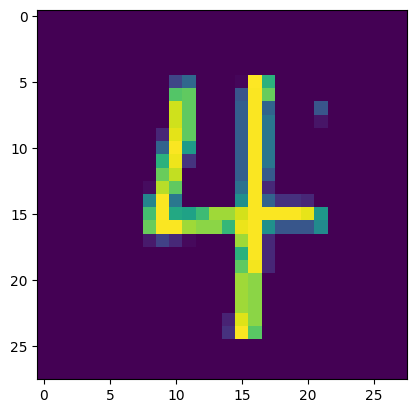

In [8]:
import matplotlib.pyplot as plt

plt.imshow(df.iloc[18810,1:].values.reshape(28,28))

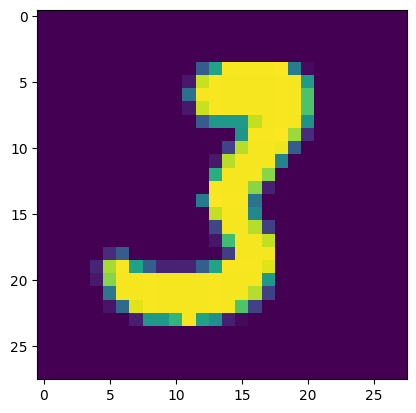

In [9]:
plt.imshow(df.iloc[1554,1:].values.reshape(28,28))

In [10]:
X =df.iloc[:,1:]
Y=df.iloc[:,0]

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train ,Y_test =train_test_split(X,Y,test_size=0.2,random_state=42)

In [13]:
X_train.shape

(33600, 784)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier()

In [18]:
knn.fit(X_train,Y_train)


KNeighborsClassifier()

In [19]:
y_predict =knn.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_predict)

0.9648809523809524

# Apply PCA

In [29]:
import pandas as pd
import numpy as np

df =pd.read_csv('dataset\\train_pca_digit.csv')


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train ,Y_test =train_test_split(X,Y,test_size=0.2,random_state=42)

In [32]:
# Step 1
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_train_trf = scaler.fit_transform(X_train)
X_test_trf =scaler.transform(X_test)

In [33]:
# PCA
from sklearn.decomposition import PCA
pca =PCA(n_components=None) # n_compents = the no. of components u want like pc1,pc2......etc


In [34]:
X_train_trf =pca.fit_transform(X_train_trf)
X_test_trf =pca.transform(X_test_trf)

In [35]:
X_train_trf.shape

(33600, 784)

In [36]:
# PCA
from sklearn.decomposition import PCA
pca =PCA(n_components=100)
X_train_trf1 =pca.fit_transform(X_train_trf)
X_test_trf1 =pca.transform(X_test_trf)


In [37]:
X_train_trf1.shape

(33600, 100)

In [39]:
knn.fit(X_train_trf,Y_train)


KNeighborsClassifier()

In [42]:
y_predict1 =knn.predict(X_test_trf)


In [50]:
accuracy_score(Y_test,y_predict1)

0.9391666666666667

In [49]:
knn.fit(X_train_trf1,Y_train)
y_predict2 =knn.predict(X_test_trf1)
accuracy_score(Y_test,y_predict1)

0.9391666666666667

In [46]:
 # jsut checking acuracy in loop
for i in range(1,785):
    

  pca =PCA(n_components=i)
  X_train_trf1 =pca.fit_transform(X_train_trf)
  X_test_trf1 =pca.transform(X_test_trf)
  
  knn=KNeighborsClassifier()
  knn.fit(X_train_trf1,Y_train)
  y_predict2 =knn.predict(X_test_trf1)
  accuracy_score(Y_test,y_predict1)  

KeyboardInterrupt: 

In [52]:
# visualize the high dimensional data in low -dimension

pca =PCA(n_components=2)
X_train_trf1 =pca.fit_transform(X_train_trf)
X_test_trf1 =pca.transform(X_test_trf)

import plotly.express as px # used plotly for dyanmical visualization
y_train_trf =Y_train.astype('str')

fig =px.scatter(df,x=X_train_trf[:,0],y =X_train_trf[:,1],color =y_train_trf ,color_discrete_sequence=px.colors.qualitative.G10)

fig.show()


In [56]:

pca =PCA(n_components=3)
X_train_trf1 =pca.fit_transform(X_train_trf)
X_test_trf1 =pca.transform(X_test_trf)

import plotly.express as px # used plotly for dyanmical visualization
y_train_trf =Y_train.astype('str')

fig =px.scatter_3d(df,x=X_train_trf[:,0],y =X_train_trf[:,1],z= X_train_trf[:,2],color =y_train_trf ,color_discrete_sequence=px.colors.qualitative.G10)

fig.show()

In [57]:
# for n_components =3
# eigen values
pca.explained_variance_


array([40.67111198, 29.17023401, 26.74459621])

In [58]:
pca.components_ # set of three vectors ,Eigen Vectors

array([[ 1.00000000e+00, -6.60506273e-16,  1.14158662e-15, ...,
         1.45456076e-16,  6.09055016e-17,  1.39512135e-16],
       [ 6.60506273e-16,  1.00000000e+00, -7.77156117e-16, ...,
         1.95504390e-16,  9.18303773e-17,  1.34946852e-16],
       [-1.14158662e-15,  1.33226763e-15,  1.00000000e+00, ...,
         2.72591950e-16,  1.57441219e-16,  2.46166871e-16]])

In [59]:
# finding the optimum no. of components
pca =PCA(n_components=None)
X_train_trf1 =pca.fit_transform(X_train_trf)
X_test_trf1 =pca.transform(X_test_trf)

In [60]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [61]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

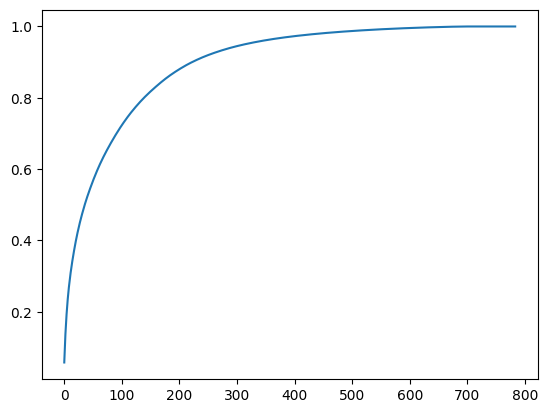

In [62]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [63]:
pca =PCA(n_components=200)
X_train_trf1 =pca.fit_transform(X_train_trf)
X_test_trf1 =pca.transform(X_test_trf)

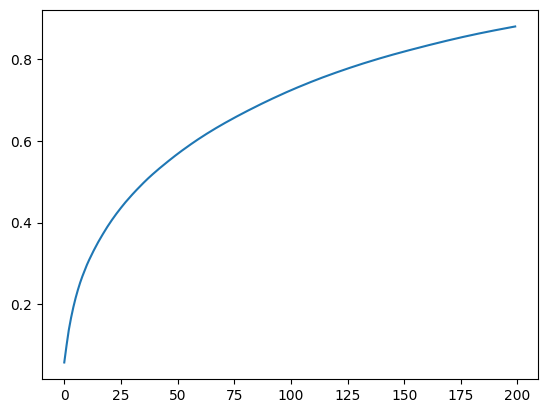

In [65]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))